In [170]:
# Rachel's part
import pandas as pd

# Load the datasets
hour_df = pd.read_csv('EDA\hour.csv')
day_df = pd.read_csv('EDA\day.csv')

# List of irrelevant columns for analysis
columns_to_exclude_from_analysis = ['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

# Keep all columns in the DataFrame but exclude the ones from analysis
hour_df_cleaned = hour_df.drop(columns=columns_to_exclude_from_analysis)
day_df_cleaned = day_df.drop(columns=columns_to_exclude_from_analysis)

# Check for missing values
print(hour_df_cleaned.isnull().sum())
print(day_df_cleaned.isnull().sum())

# Drop rows with missing values (if any)
hour_df_cleaned.dropna(inplace=True)
day_df_cleaned.dropna(inplace=True)

# Check for duplicates and drop them
hour_df_cleaned.drop_duplicates(inplace=True)
day_df_cleaned.drop_duplicates(inplace=True)

# IQR for hourly data (only for 'cnt' column)
Q1_hour = hour_df_cleaned['cnt'].quantile(0.25)
Q3_hour = hour_df_cleaned['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour
hour_df_cleaned = hour_df_cleaned[(hour_df_cleaned['cnt'] >= (Q1_hour - 1.5 * IQR_hour)) & (hour_df_cleaned['cnt'] <= (Q3_hour + 1.5 * IQR_hour))]

# IQR for daily data (only for 'cnt' column)
Q1_day = day_df_cleaned['cnt'].quantile(0.25)
Q3_day = day_df_cleaned['cnt'].quantile(0.75)
IQR_day = Q3_day - Q1_day
day_df_cleaned = day_df_cleaned[(day_df_cleaned['cnt'] >= (Q1_day - 1.5 * IQR_day)) & (day_df_cleaned['cnt'] <= (Q3_day + 1.5 * IQR_day))]

# Concatenate both dataframes into one (keeping all columns)
combined_df = pd.concat([hour_df_cleaned, day_df_cleaned], axis=0, ignore_index=True)

# Check for duplicates in combined dataframe and drop them
combined_df.drop_duplicates()

# Save the combined cleaned data to a new CSV file with all columns included
combined_df.to_csv('cleaned_bike_data.csv', index=False)



instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
weekday       0
weathersit    0
temp          0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
weekday       0
weathersit    0
temp          0
cnt           0
dtype: int64


In [171]:
# Ken's part
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
# Load csv file from GitHub into a DataFrame
df = pd.read_csv('cleaned_bike_data.csv')

# Check top 3 rows of DataFrame
df.head(3)

,instant,dteday,season,yr,mnth,hr,weekday,weathersit,temp,cnt
0,1,2011-01-01,1,0,1,0.0,6,1,0.24,16
1,2,2011-01-01,1,0,1,1.0,6,1,0.22,40
2,3,2011-01-01,1,0,1,2.0,6,1,0.22,32


In [173]:
# Check number of rows and columns
df.shape

(17605, 10)

In [174]:
# Check column names and types
df.info()

# 'dteday' column is a string, which will need to be converted to datetime if using date in calculations
# Columns 'temp', 'atemp', 'hum', and 'windspeed' are floats
# The remaining columns are all integers
# This dataset does not have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17605 entries, 0 to 17604
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17605 non-null  int64  
 1   dteday      17605 non-null  object 
 2   season      17605 non-null  int64  
 3   yr          17605 non-null  int64  
 4   mnth        17605 non-null  int64  
 5   hr          16874 non-null  float64
 6   weekday     17605 non-null  int64  
 7   weathersit  17605 non-null  int64  
 8   temp        17605 non-null  float64
 9   cnt         17605 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.3+ MB


In [175]:
# Check summary stats (also checking for outliers)
df.describe()

# Some observations: there is a significant difference between the number of 'casual' and 'registered' users, seen when comparing min/max and the percentile groupings.
# Column 'weekday' has integeres between 0-6, so week starts at 0
# Column 'weathersit' has no rows that are '4', meaning there was no 'Heavy Rain' during the entire time period of the dataset
# Column 'cnt' min in 22, and max is 8714, meaning significant fluctuation of total rental bikes throughout time period
# No outliers spotted, as all columns make sense in regards to the numbers inputted and what ethe column represents

,instant,season,yr,mnth,hr,weekday,weathersit,temp,cnt
count,17605.000000,17605.000000,17605.000000,17605.000000,16874.000000,17605.000000,17605.000000,17605.000000,17605.000000
mean,8202.675604,2.490656,0.488270,6.513547,11.458101,2.997728,1.429196,0.492764,352.569725
std,5167.095518,1.111887,0.499877,3.461904,6.962144,2.012655,0.638952,0.192070,961.994438
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.020000,1.000000
25%,3671.000000,1.000000,0.000000,4.000000,5.000000,1.000000,1.000000,0.340000,41.000000
50%,8073.000000,2.000000,0.000000,7.000000,11.000000,3.000000,1.000000,0.500000,145.000000
75%,12642.000000,3.000000,1.000000,10.000000,18.000000,5.000000,2.000000,0.640000,287.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,6.000000,4.000000,1.000000,8714.000000


In [176]:
# Check if any duplicates
df.duplicated().sum()

# No duplicates

0

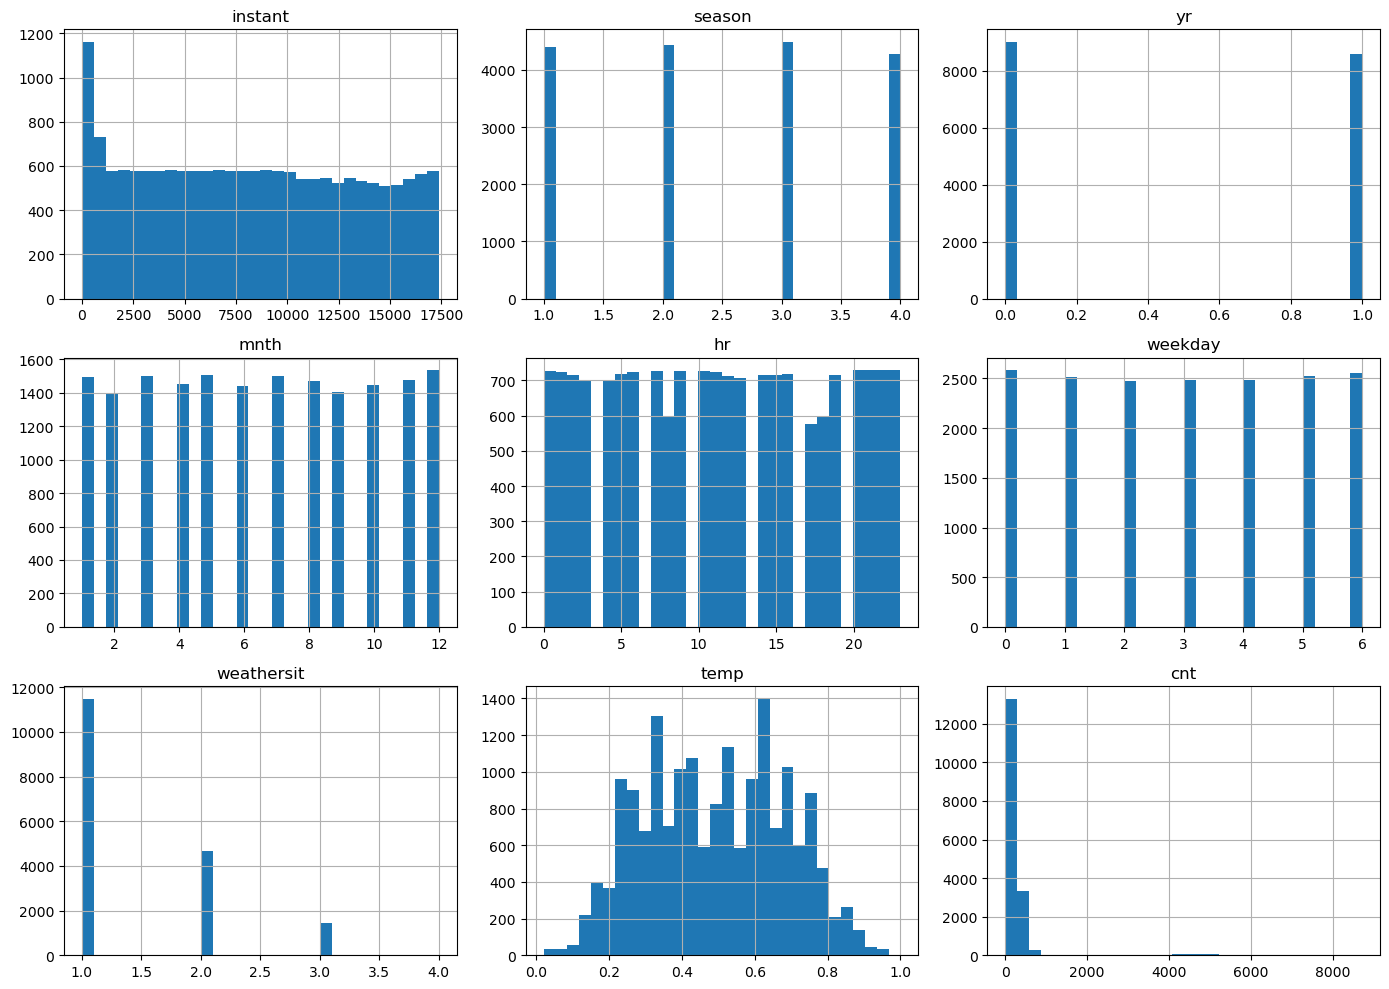

In [177]:
# Check and visualize distribution of features
df.hist(figsize=(14, 10), bins=30)  
# prevent overlap
plt.tight_layout() 
plt.show()

# Some observations: most common weather type was '1' for clear, followed by '2' for misty which occurred about half the time as '1', very few '3' for light snow, and no '4' at all for heavy rain.
# Significantly more 'registered' users

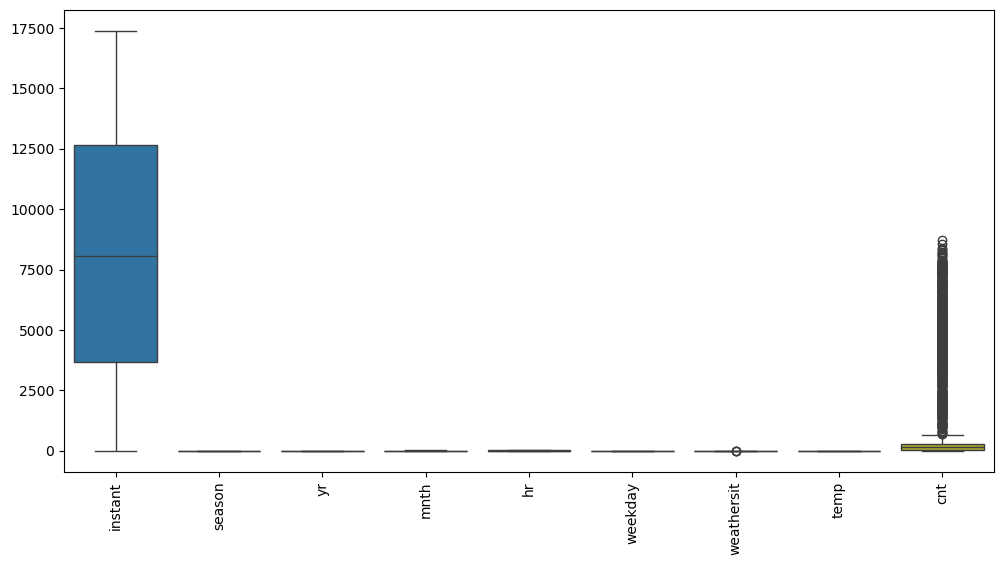

In [178]:
# Visualizing and detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# 'casual' column shows a large number of outliers, which most likely means there are certain times when these casual users are renting bikes more often, which makes the fluctuations
# wider than the 'registered' users.

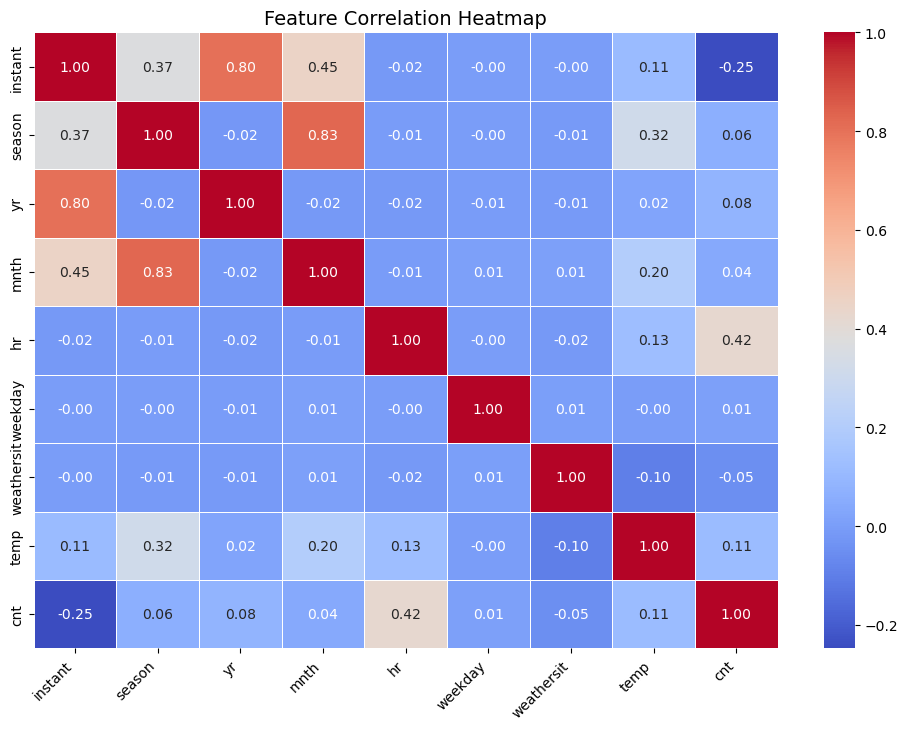

In [179]:
# Correlation matrix to check relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["dteday"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Initial observations: season, year, weathersit, temp, atemp, and windspeed affect the number of rentals ('cnt')

In [180]:
# Efren's part
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('cleaned_bike_data.csv')

# Define features and target
X = data.drop(columns=['cnt'])  # Predictors
y = data['cnt']  # Target variable

# Identify categorical and numerical columns
#categorical_features = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']
categorical_features = ['season', 'yr', 'mnth', 'weekday', 'hr', 'weathersit'] #for cleaned_bike_data.csv
numerical_features = ['temp']

# Outlier Detection for the target variable y
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# outliers in y
outliers = (y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR))


# Remove outliers from y and the corresponding rows in X
X_cleaned = X[~outliers]
y_cleaned = y[~outliers]

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(X_cleaned[categorical_features])

# Scale numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(X_cleaned[numerical_features])

# Combine transformed features
X_transformed = np.hstack((X_num, X_cat))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_cleaned, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model. new metric
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean absolute Error: {mae}')
# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 7732.0703351327375
Mean absolute Error: 65.74740997066861
R² Score: 0.6604870641199077


In [181]:
# Saleha's part
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('cleaned_bike_data.csv')

# Define features and target
X = data.drop(columns=['cnt'])  # Predictors
y = data['cnt']  # Target variable

# Identify categorical and numerical columns
categorical_features = ['season', 'yr', 'mnth', 'weekday', 'hr', 'weathersit']  # For cleaned_bike_data.csv
numerical_features = ['temp']

# Outlier Detection for the target variable y
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# Outliers in y
outliers = (y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR))

# Remove outliers from y and the corresponding rows in X
X_cleaned = X[~outliers]
y_cleaned = y[~outliers]

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(X_cleaned[categorical_features])

# Scale numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(X_cleaned[numerical_features])

# Combine transformed features
X_transformed = np.hstack((X_num, X_cat))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_cleaned, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - Mean Absolute Error (MAE): {mae}")
    print(f"  - R² Score: {r2}")
    print()

# Train and evaluate Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
evaluate_model(y_test, y_pred_linear, "Linear Regression")

# Train and evaluate Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
evaluate_model(y_test, y_pred_tree, "Decision Tree Regressor")

# Train and evaluate Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
evaluate_model(y_test, y_pred_forest, "Random Forest Regressor")

Linear Regression Metrics:
  - Mean Squared Error (MSE): 7732.0703351327375
  - Mean Absolute Error (MAE): 65.74740997066861
  - R² Score: 0.6604870641199077

Decision Tree Regressor Metrics:
  - Mean Squared Error (MSE): 5045.713223439608
  - Mean Absolute Error (MAE): 40.44595795084395
  - R² Score: 0.7784442153461636

Random Forest Regressor Metrics:
  - Mean Squared Error (MSE): 2690.355256393206
  - Mean Absolute Error (MAE): 30.893308051431013
  - R² Score: 0.8818672914150599



The Random Forest Regressor seems to be the best-performing model for this dataset, achieving the lowest error (MSE = 2690.36, MAE = 30.89) and the highest explanatory power (R² = 0.88). 

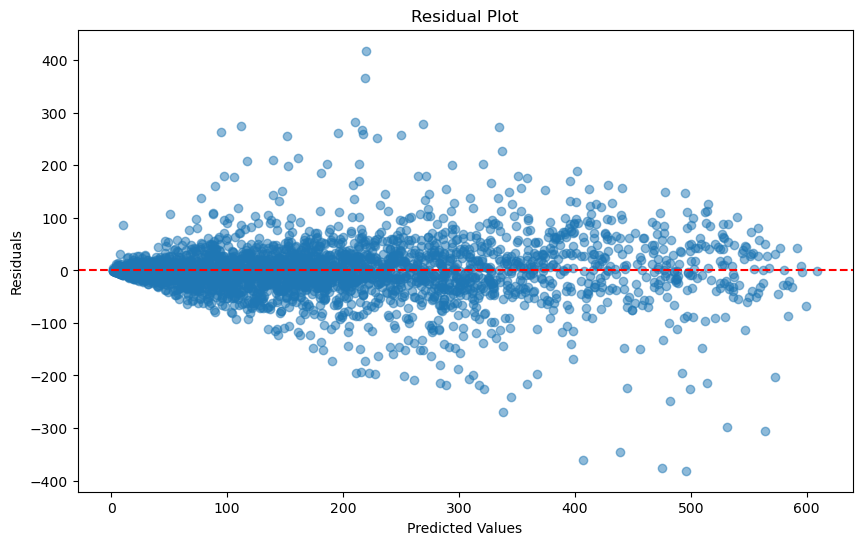

In [182]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_forest

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_forest, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()